In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "vlim"
z_range = "all_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])

    i=0
    for index,cluster in tqdm(clusters.iterrows()):
        ng_list[(i),:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
        i=i+1
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

38it [00:00, 372.59it/s]

62it [00:00, 307.58it/s]

103it [00:00, 330.62it/s]

145it [00:00, 351.04it/s]

186it [00:00, 365.92it/s]

227it [00:00, 376.30it/s]

269it [00:00, 386.02it/s]

306it [00:00, 374.20it/s]

342it [00:00, 369.19it/s]

381it [00:01, 374.93it/s]

418it [00:01, 366.74it/s]

458it [00:01, 374.57it/s]

497it [00:01, 377.96it/s]

537it [00:01, 381.45it/s]

576it [00:01, 374.20it/s]

614it [00:01, 372.62it/s]

645it [00:01, 372.40it/s]


0it [00:00, ?it/s]

41it [00:00, 404.34it/s]

82it [00:00, 403.67it/s]

114it [00:00, 373.88it/s]

156it [00:00, 386.60it/s]

199it [00:00, 396.73it/s]

242it [00:00, 404.67it/s]

285it [00:00, 409.85it/s]

327it [00:00, 411.42it/s]

369it [00:00, 412.28it/s]

409it [00:01, 385.53it/s]

447it [00:01, 335.77it/s]

489it [00:01, 355.37it/s]

531it [00:01, 371.95it/s]

573it [00:01, 383.55it/s]

615it [00:01, 392.99it/s]

645it [00:01, 389.89it/s]

In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_ylim(-0.020,0.020)
    plt.show()
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

# Abs Plots

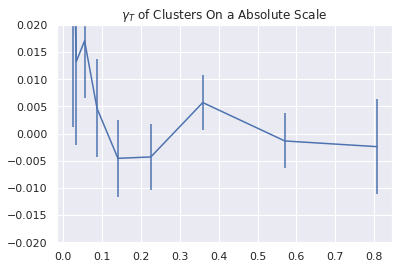

[  0.      -1.5554  -2.8212  -6.7231  -2.9832   5.3058   7.2903 -12.6262
   3.2096   1.6902]
------------------------------------------------------------------------------
[    0.      -131.3321  -726.2354 -1146.426  -1578.4762 -2289.9842
 -2527.8823 -2268.021  -1327.5046  -150.4564]
------------------------------------------------------------------------------
[   0.   35.  213.  394.  645. 1166. 1695. 2213. 2363.  703.]
------------------------------------------------------------------------------
[    nan -0.0444 -0.0132 -0.0171 -0.0046  0.0046  0.0043 -0.0057  0.0014
  0.0024]
------------------------------------------------------------------------------
[    nan -3.7523 -3.4096 -2.9097 -2.4472 -1.964  -1.4914 -1.0249 -0.5618
 -0.214 ]
------------------------------------------------------------------------------


In [19]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_T$ of Clusters On a Absolute Scale ")
for data  in sum_abs:
    print(data)
    print(sep)
for data in mean_abs:
    print(data)
    print(sep)

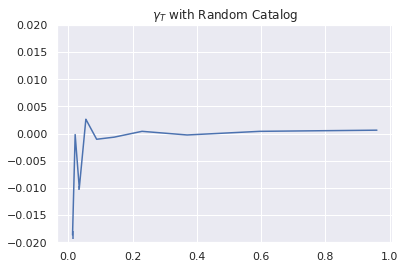

[-0.0187 -0.0002 -0.01    0.0026 -0.001  -0.0007  0.0004 -0.0003  0.0004
  0.0006]
[ 7.3500e-04  7.1623e-06  3.9495e-04 -1.0384e-04  4.1167e-05  2.5851e-05
 -1.6299e-05  1.0107e-05 -1.6222e-05 -2.4666e-05]


In [20]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_T$ with Random Catalog")
print(-r_xi)
print(r_sigma)

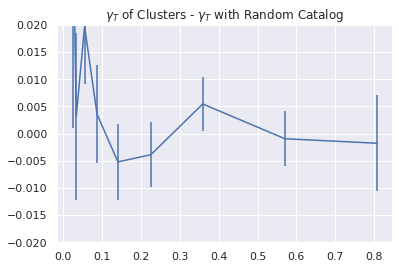

In [21]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_T$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

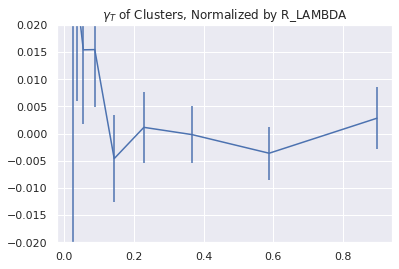

[ 0.     -0.1951 -3.3767 -4.2062 -8.0032  4.057  -1.6473  0.3683  8.7291
 -4.9391]
------------------------------------------------------------------------------
[    0.       -11.2191  -432.346   -793.3995 -1261.5601 -1711.4622
 -2118.0377 -2032.0034 -1281.8219  -188.971 ]
------------------------------------------------------------------------------
[   0.    3.  130.  273.  518.  881. 1435. 2023. 2415. 1749.]
------------------------------------------------------------------------------
[    nan -0.065  -0.026  -0.0154 -0.0155  0.0046 -0.0011  0.0002  0.0036
 -0.0028]
------------------------------------------------------------------------------
[    nan -3.7397 -3.3257 -2.9062 -2.4354 -1.9426 -1.476  -1.0045 -0.5308
 -0.108 ]
------------------------------------------------------------------------------


In [22]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_T$ of Clusters, Normalized by R_LAMBDA")
for data  in sum_rel:
    print(data)
    print(sep)
for data in mean_rel:
    print(data)
    print(sep)